# Reproducing the area of Nb nanowire in Annunziata 

Number of turns is 40

So the effective area for the Nb nanowire should be [12.14785696] um x [12.14785696] um


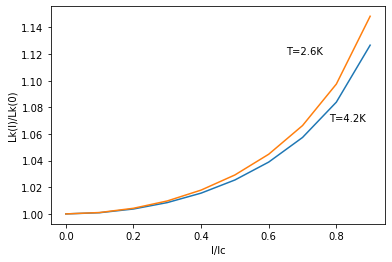

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math

#Nb 
#Problem Parameters
m = 9.1093e-31  ## electron mass
e = 1.60217e-17 ## electron charge
l=500e-6 ## length of the nanowire                 
w=100e-9 ## width of the nanowire                   
t=15e-9 ## Thickness of the nanowire  
Tc=9 ## Critical Temperature From literature
Kb=1.38e-23 ##Boltzman Constant
del00= 1.76*Kb*Tc ##Energy Gap at zero temp and zero bias current
h=6.626e-34 ##Plank's Constant
Rsq= 20 ##sheet resistivity
frac=0;

def eq3(xi):
    return [(frac) - (1.897*(math.exp(-3*np.pi*xi[0]/8))*math.sqrt(xi[0])*(np.pi/2-2*xi[0]/3))] ##equation3

def eq4(x):
    return [(l-(x[0]*(d+x[0])/(d+w)))] ##equation4

for T in range (2,6,2): #running the code at two different temperatures T=0K and 10K
    
    
    arr1=[] ##for storing I/Ic values
    arr2=[] ##for storing Lk values
    arr3=[] ##for storing Lk/Lk(0) values
    
    
    if (T== 2): 
        T=T+0.6
    else: 
        T=T+0.2
                
    #sweeping I
    for frac in range (0,10,1):
        frac =frac/10

        #Solving for \xi        
        xi = fsolve(eq3,[0])

        #Solving for delta
        delta=del00*math.exp(-np.pi*xi/4) ##equation2

        #Solving for Lk
        Lk=(l/(w))*(Rsq*h)/(2*(np.pi**2)*delta*math.tanh(delta/(2*Kb*T))) ##equation1    

        arr1.append(frac)
        arr2.append(Lk)

    for number in arr2:
        arr3.append(number / arr2[0])

    #Do the plot        
    plt.plot(arr1,arr3)    
    
plt.xlabel("I/Ic")
plt.ylabel("Lk(I)/Lk(0)")
#plt.axis([0.2, 0.45, 1, 1.05]) ##Scaling
plt.text(0.65, 1.12, "T=2.6K")
plt.text(0.78, 1.07, "T=4.2K")


#calculating the effective area
#assuming square
d=2*w #assuming spacing d is double the width
x = fsolve(eq4,[1])
n=int(x/(d+w))
print("Number of turns is", n)
print ("\nSo the effective area for the Nb nanowire should be",x*1e6, "um x",x*1e6, "um")       
